In [5]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import copy
import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

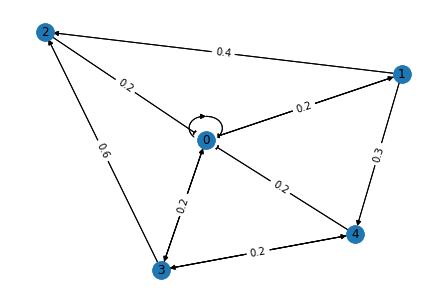

In [6]:
# https://stackoverflow.com/questions/56597840/drawing-weighted-graph-from-adjacency-matrix-with-edge-labels
# Directed weighted graph from weighted Adjacency Matric (matrix C in J. Lizier paper)

A = [
    [0.2, 1,  0,  .8, 0],
    [0.2, 0,  .4, 0,  .3],
    [0.2, 0,  0,  0,  0],
    [0.2, 0,  .6, 0,  .7],
    [0.2, 0,  0,  .2, 0]]

G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.DiGraph)
layout = nx.kamada_kawai_layout(G)
nx.draw(G, layout)
nx.draw_networkx(G, pos=layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels)
plt.show()

In [11]:
nodes = [node for node in G.nodes() if node != 4 ]
nodes

[0, 1, 2, 3]

In [21]:
def TReconnectIncomingEdgeToOtherNode(g_orig, inPlace=True):
    
    "MCMC transformation that preserves number of edges and nodes, and outgoing degree distribution, but not incoming degree distribution"
    "Applicable for directed networks"
    "This transfromation also preserve the sum of outgoing weights from a node, therefore will preserve eigenvector (1,1,1,...1) if there is one"
    
    if inPlace == False:
        g=copy.deepcopy(g_orig)
    else:
        g=g_orig

    '''Swap edges'''
    N=g.number_of_nodes()
    L=g.number_of_edges()

    #Select a random node with at least outgoing degree = 1
    #node1 = list(g.nodes())[np.random.randint(0,N)]
    nodes_with_non_zero_out_degree = [node for node in g.nodes() if g.out_degree(node)> 0]
    if nodes_with_non_zero_out_degree.count == 0:
        print("Cannot find a node with an outgoing edge, what is that network???")
        return g

    node1 = random.choice(nodes_with_non_zero_out_degree)
    print(f'origin node selected {node1}')

    #Select a random edge from that node
    edge_to_reconnect = random.choice(list(G.out_edges(node1, data=True)))
    print(f'edge to reconnect:{edge_to_reconnect}')

    #Select another random node to connect that edge to
    node2 = [node for node in g.nodes() if node != edge_to_reconnect[1]][np.random.randint(0,N-1)]
    print(f'dest node selected {node2}')
    
    g.add_weighted_edges_from([(node1, node2, edge_to_reconnect[2]['weight'])])
    print(f'new edge: {(node1, node2)}')
    g.remove_edge(edge_to_reconnect[0], edge_to_reconnect[1])
    print(f'removed edge: {edge_to_reconnect}')
    return(g)


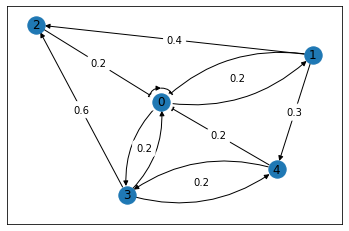

In [34]:
# https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

layout = nx.kamada_kawai_layout(G)
#nx.draw(G, layout)
labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_nodes(G, pos=layout)
nx.draw_networkx_labels(G, pos=layout)

curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos=layout, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos=layout, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')

#nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, connectionstyle='arc3, rad = 0.1')
#nx.draw(G, pos=layout, with_labels=True, connectionstyle='arc3, rad = 0.1')

edge_weights = nx.get_edge_attributes(G,'weight')
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
nx.draw_networkx_edge_labels(G, pos=layout,  edge_labels=curved_edge_labels,rotate=False) #,rad = arc_rad)
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=straight_edge_labels,rotate=False)

plt.show()

In [22]:
newG = TReconnectIncomingEdgeToOtherNode(G, inPlace=False)

origin node selected 0
edge to reconnect:(0, 3, {'weight': 0.8})
dest node selected 4
new edge: (0, 4)
removed edge: (0, 3, {'weight': 0.8})


In [25]:
list(G.edges(data=True))

[(0, 0, {'weight': 0.2}),
 (0, 1, {'weight': 1.0}),
 (0, 3, {'weight': 0.8}),
 (1, 0, {'weight': 0.2}),
 (1, 2, {'weight': 0.4}),
 (1, 4, {'weight': 0.3}),
 (2, 0, {'weight': 0.2}),
 (3, 0, {'weight': 0.2}),
 (3, 2, {'weight': 0.6}),
 (3, 4, {'weight': 0.7}),
 (4, 0, {'weight': 0.2}),
 (4, 3, {'weight': 0.2})]

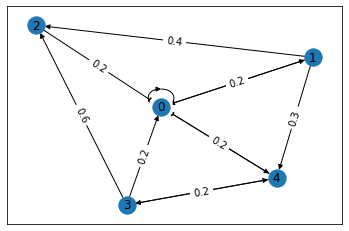

In [24]:
nx.draw_networkx(newG, pos=layout)
labels = nx.get_edge_attributes(newG, "weight")
nx.draw_networkx_edge_labels(newG, pos=layout, edge_labels=labels)
plt.show()